# K-means & Hierarchical clustering

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

CUST_ID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases 

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

PURCHASES: Amount of purchases made from account 

ONEOFF_PURCHASES: Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES: Amount of purchase done in installment

CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 

 ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid 

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of Credit Card for user 

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user 

PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

1. Load your dataset. 

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters. 

4. Plot the dendrogram. Use k-means clustering. 

5. Try different k values and select the best one. 

6. Plot the clusters. 

7. Compare the two results. 

Bonus: search for another validation metric



# 1. Load your dataset.

In [18]:
import pandas as pd
data = pd.read_csv(r'CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [20]:
data["CREDIT_LIMIT"].isnull().sum()

1

In [21]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
data["CREDIT_LIMIT"].isnull().sum()

0

In [22]:
data["MINIMUM_PAYMENTS"].isnull().sum()

313

In [23]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)
data["MINIMUM_PAYMENTS"].isnull().sum()

0

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
data['CUST_ID']=encoder.fit_transform(data['CUST_ID'])
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int32  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# 2. Use hierarchical clustering to identify the inherent groupings within your data.

In [27]:
import pandas as pd

In [28]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering (n_clusters=8, affinity = 'euclidean' , linkage = 'ward' )
clust_labels = model.fit_predict(data)

In [29]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative # The number of cluster for each point

,0
0,2
1,4
2,0
3,0
4,2
...,...
8945,5
8946,5
8947,5
8948,5


# 3. Plot the clusters. 

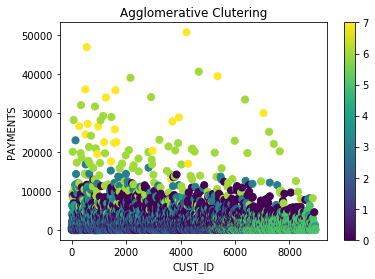

In [30]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['CUST_ID'] , data ['PAYMENTS'] , c= agglomerative[0], s=50)
ax.set_title('Agglomerative Clutering')
ax.set_xlabel('CUST_ID')
ax.set_ylabel('PAYMENTS')
plt.colorbar(scatter)

# 4. Plot the dendrogram. Use k-means clustering.

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit((data))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [65]:
labels = pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,3
2,6
3,4
4,4
...,...
8945,1
8946,1
8947,1
8948,1


In [66]:
y_kmeans=kmeans.predict(data)

In [67]:
kmeans.predict (data)
print(kmeans.cluster_centers_)

[[ 1.85858554e-01 -7.00910968e-01 -2.13391917e+00 -3.11064555e-01
  -2.36006232e-01 -3.01808068e-01 -3.20634194e-01 -5.54993807e-01
  -4.42321889e-01 -4.38494557e-01 -5.19343600e-01 -3.74412075e-01
  -4.19400274e-01 -1.79474929e-01 -2.02423744e-01 -2.57548769e-01
   2.78899783e-01  2.08955446e-01]
 [ 7.07495523e-01 -3.47608278e-01 -3.74642083e-01 -2.92290267e-01
  -2.17641959e-01 -2.90901564e-01  5.51215521e-02 -1.98628800e-01
  -2.87283381e-01 -2.24165444e-01  3.06134807e-01  1.19113048e-02
  -3.85974810e-01 -5.77369477e-01 -3.96955005e-01 -2.07918563e-01
   9.28283921e-03 -3.19864320e+00]
 [-5.44875786e-01  1.07741467e+00  4.66734219e-01  2.50626375e+00
   1.81628349e+00  2.58923922e+00 -1.40131416e-01  1.16390302e+00
   1.54318104e+00  1.27049752e+00 -2.80335915e-01 -1.43033642e-01
   3.13074354e+00  1.31313150e+00  1.46153076e+00  7.56136179e-01
   2.42155363e-01  3.37328257e-01]
 [-3.29846337e-01  1.71616092e+00  3.92320983e-01 -2.20785980e-01
  -1.58940014e-01 -2.30111394e-01  2.

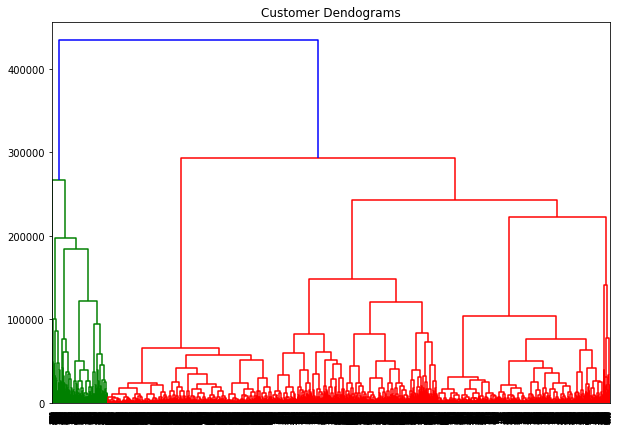

In [35]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

# 5. Try different k values and select the best one.

In [71]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data=scaler.fit_transform(data)

In [72]:
data = pd.DataFrame(scaled_data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.731857,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,-1.731470,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,-1.731083,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,-1.730696,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.858355e-16,-0.525551,0.360680
4,-1.730309,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.730309,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,1.730696,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-5.858355e-16,-0.525551,-4.122768
8947,1.731083,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,1.731470,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


In [95]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

Calculating the silhouette coefficient

In [97]:
from sklearn import metrics
labels = km.labels_

In [98]:
metrics.silhouette_score(data, labels, metric = 'euclidean')

0.14835114516059306

and CH score

In [99]:
metrics.calinski_harabasz_score(data, labels)

867.7687851349228

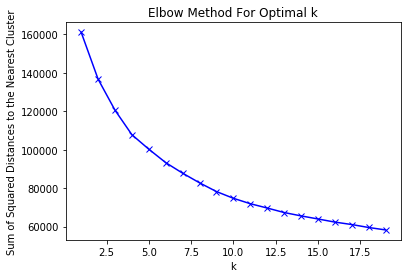

In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k) 
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances to the Nearest Cluster')
plt.title('Elbow Method For Optimal k')
plt.show()

As the chart above shows, the diminishing return hits at k = 8. After k =8, the metric gets better at a much slower rate.

#Fit the model with k = 8 best K value

In [101]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit((data))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Evaluate Cluster Fitness using Calinski Harabasz Score (Variance Ratio)

In [108]:
from sklearn.metrics.cluster import calinski_harabasz_score
metrics.calinski_harabasz_score(data, labels)

867.7687851349228

# 6- Plot the clusters.

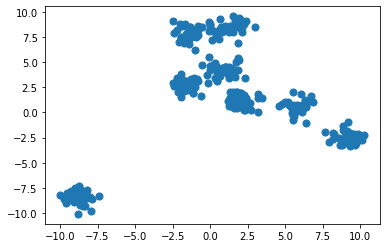

In [109]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=8,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [110]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

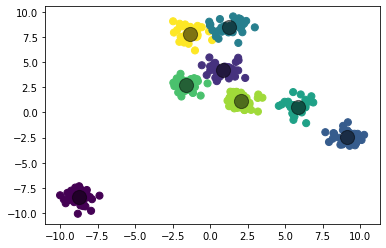

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# 7. Compare the two results. 

We can see from the Kmean plot that the centroids determine clearly the number of clusters against the hierarchical clustering plot.

# Bonus

In [112]:
from sklearn import metrics
labels = km.labels_

In [113]:
metrics.silhouette_score(data, labels, metric = 'euclidean')

0.15662681804496226